In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [15]:
top = pd.read_csv('top200.csv')
bottom = pd.read_csv('bottom200.csv')
top['type'] = 0 # 0 for top
bottom['type'] = 1 # 1 for bottom
df = pd.concat([top, bottom], ignore_index=True)
df = pd.get_dummies(df, columns=['genre'])
df.head()

,title,artist,rank,danceability,energy,key,loudness,mode,speechiness,acousticness,...,summer,autumn,id,type,genre_autre,genre_hip hop,genre_pop,genre_r&b,genre_rap,genre_rock
0,TOUT VA BIEN (feat. Ninho & Naps),Alonzo,1,0.660,0.720,3.0,-5.874,0.0,0.0753,0.3010,...,1,1,6OZwia8loN0aPS0vTvsBjR,0,0,0,0,0,1,0
1,FADE UP,ZEG P,2,0.758,0.599,4.0,-5.990,0.0,0.0877,0.5700,...,1,1,4ZpIuzx91EAPK3VimONbfB,0,1,0,0,0,0,0
2,DIE,Gazo,3,0.695,0.630,8.0,-7.160,0.0,0.0350,0.2290,...,1,1,3D29kjUyWxsT3jUUTtARVQ,0,0,0,0,0,1,0
3,PETETE,Gambi,4,0.752,0.669,10.0,-9.817,0.0,0.2510,0.1670,...,1,1,0z3bi63SNZ5ylyHOzb81Uq,0,0,0,0,0,1,0
4,Time Time,Trei Degete,5,0.715,0.799,0.0,-6.447,0.0,0.0433,0.0141,...,0,1,5wKDPtbdggE1roeVp3UdXX,0,1,0,0,0,0,0


In [16]:
df = df.drop(['title', 'artist', 'rank', 'lyrics', 'id'], axis = 1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,spring,summer,autumn,type,genre_autre,genre_hip hop,genre_pop,genre_r&b,genre_rap,genre_rock
0,0.660,0.720,3.0,-5.874,0.0,0.0753,0.3010,0.000000,0.2260,0.628,...,1,1,1,0,0,0,0,0,1,0
1,0.758,0.599,4.0,-5.990,0.0,0.0877,0.5700,0.000001,0.1290,0.557,...,0,1,1,0,1,0,0,0,0,0
2,0.695,0.630,8.0,-7.160,0.0,0.0350,0.2290,0.000000,0.1180,0.550,...,0,1,1,0,0,0,0,0,1,0
3,0.752,0.669,10.0,-9.817,0.0,0.2510,0.1670,0.000000,0.0795,0.627,...,0,1,1,0,0,0,0,0,1,0
4,0.715,0.799,0.0,-6.447,0.0,0.0433,0.0141,0.003500,0.3420,0.916,...,0,0,1,0,1,0,0,0,0,0


In [17]:
Y = df.pop('type')
x = df.values #returns a numpy array

# normalizing the dataset
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

len(X_train), len(X_vali), len(X_test)

(1423, 475, 475)

In [18]:
test = np.array(X_train)
pca = PCA(.95)
pca.fit(test)
print(f'Number of components that can retain 95% of the variance: {pca.n_components_}')

Number of components that can retain 95% of the variance: 13


In [19]:
# Uncomment for CNN model

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# X_vali = np.array(X_vali)
# X_train = X_train.reshape(X_train.shape[0],  X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)
# X_vali = X_vali.reshape(X_vali.shape[0],  X_vali.shape[1], 1)
# X_train.shape

In [153]:
# CNN Model

# model = keras.Sequential([
#   layers.Conv1D(64, (3), activation='relu', padding='same', input_shape=(X_train.shape[1], 1 )),
#   layers.MaxPooling1D((2)),
#   layers.Dropout(0.2),
#   layers.Conv1D(32, (3), activation='relu', padding='same'),
#   layers.MaxPooling1D((2)),
#   layers.Dropout(0.2),
#   layers.Conv1D(16, (3), activation='relu', padding='same'),
#   layers.MaxPooling1D((2)),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(64, activation='relu'),
#   layers.Dense(1, activation='softmax')
# ])
# model.summary()

# Fully Connected Model

model = keras.Sequential([
  layers.Dense(64, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal', input_shape=(X_train.shape[1],)),
  layers.Dense(32, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal'),
  layers.Dense(16, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal', kernel_regularizer=keras.regularizers.l2(0.0165)),
  layers.Dense(8, activation='relu', kernel_initializer='random_normal', bias_initializer='random_normal', kernel_regularizer=keras.regularizers.l2(0.0165)),
  layers.Dense(1, activation=tf.nn.sigmoid),
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 64)                1536      
                                                                 
 dense_96 (Dense)            (None, 32)                2080      
                                                                 
 dense_97 (Dense)            (None, 16)                528       
                                                                 
 dense_98 (Dense)            (None, 8)                 136       
                                                                 
 dense_99 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.compile(
      optimizer=keras.optimizers.Adam(), 
      loss='binary_crossentropy',
      metrics=['accuracy']
      )

In [155]:
earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                             patience=20)

results = model.fit(X_train, y_train, 
                  batch_size=32,
                  epochs=200, 
                  validation_data=(X_vali, y_vali), 
                  callbacks=[earlyStop]
                  )

Epoch 1/200
45/45 [==============================] - 2s 13ms/step - loss: 0.7062 - accuracy: 0.5538 - val_loss: 0.6954 - val_accuracy: 0.5537
Epoch 2/200
45/45 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5538 - val_loss: 0.6889 - val_accuracy: 0.5537
Epoch 3/200
45/45 [==============================] - 0s 5ms/step - loss: 0.6859 - accuracy: 0.5538 - val_loss: 0.6818 - val_accuracy: 0.5537
Epoch 4/200
45/45 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.5538 - val_loss: 0.6726 - val_accuracy: 0.5537
Epoch 5/200
45/45 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.5966 - val_loss: 0.6693 - val_accuracy: 0.6232
Epoch 6/200
45/45 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.6395 - val_loss: 0.6712 - val_accuracy: 0.6168
Epoch 7/200
45/45 [==============================] - 0s 5ms/step - loss: 0.6583 - accuracy: 0.6423 - val_loss: 0.6704 - val_accuracy: 0.6232
Epoch 8/200


In [156]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc:.3f}")

15/15 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6358
Accuracy: 0.636


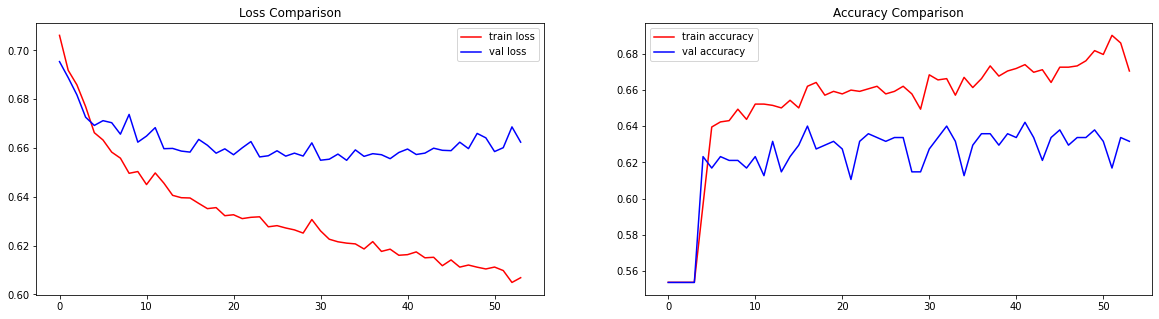

In [157]:
# Plotting the loss and accuracy of the model
fig, axis = plt.subplots(1, 2, figsize=(20, 5))
axis[0].plot(results.history["loss"], color='r', label = 'train loss')
axis[0].plot(results.history["val_loss"], color='b', label = 'val loss')
axis[0].set_title('Loss Comparison')
axis[0].legend()
axis[1].plot(results.history["accuracy"], color='r', label = 'train accuracy')
axis[1].plot(results.history["val_accuracy"], color='b', label = 'val accuracy')
axis[1].set_title('Accuracy Comparison')
axis[1].legend()

In [158]:
model.predict(X_test.iloc[[10]])

array([[0.3826223]], dtype=float32)